#### People apply for credit cards one time in year on average, but how approve process and different offers can be determinde based on the applicant's history?<br> The data set includes customer's behavior credit cards spending, it's taken from Kaggle public datasets and I am going to predict amount of cash advance in order to categorize the applicants for the offer.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
 BankAccInfo= pd.read_csv('~/Downloads/CC GENERAL.csv')

In [42]:
BankAccInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##### There are some missing values in "CREDIT_LIMIT" and "MINIMUM_PAYMENT" columns so I fill them with backfill method.

In [43]:
BankAccInfo = BankAccInfo.fillna(method='backfill')

In [44]:
BankAccInfo.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,244.791237,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [45]:
BankAccInfo.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.673534,1733.143852,865.320834,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.674167,2895.063757,2348.881285,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,168.940844,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,313.659939,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,832.178621,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### I decided to not use the columns that has frequency since they have low variance:

In [46]:
Applicants = BankAccInfo[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
        'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

Text(0.5, 0.98, 'Colerration')

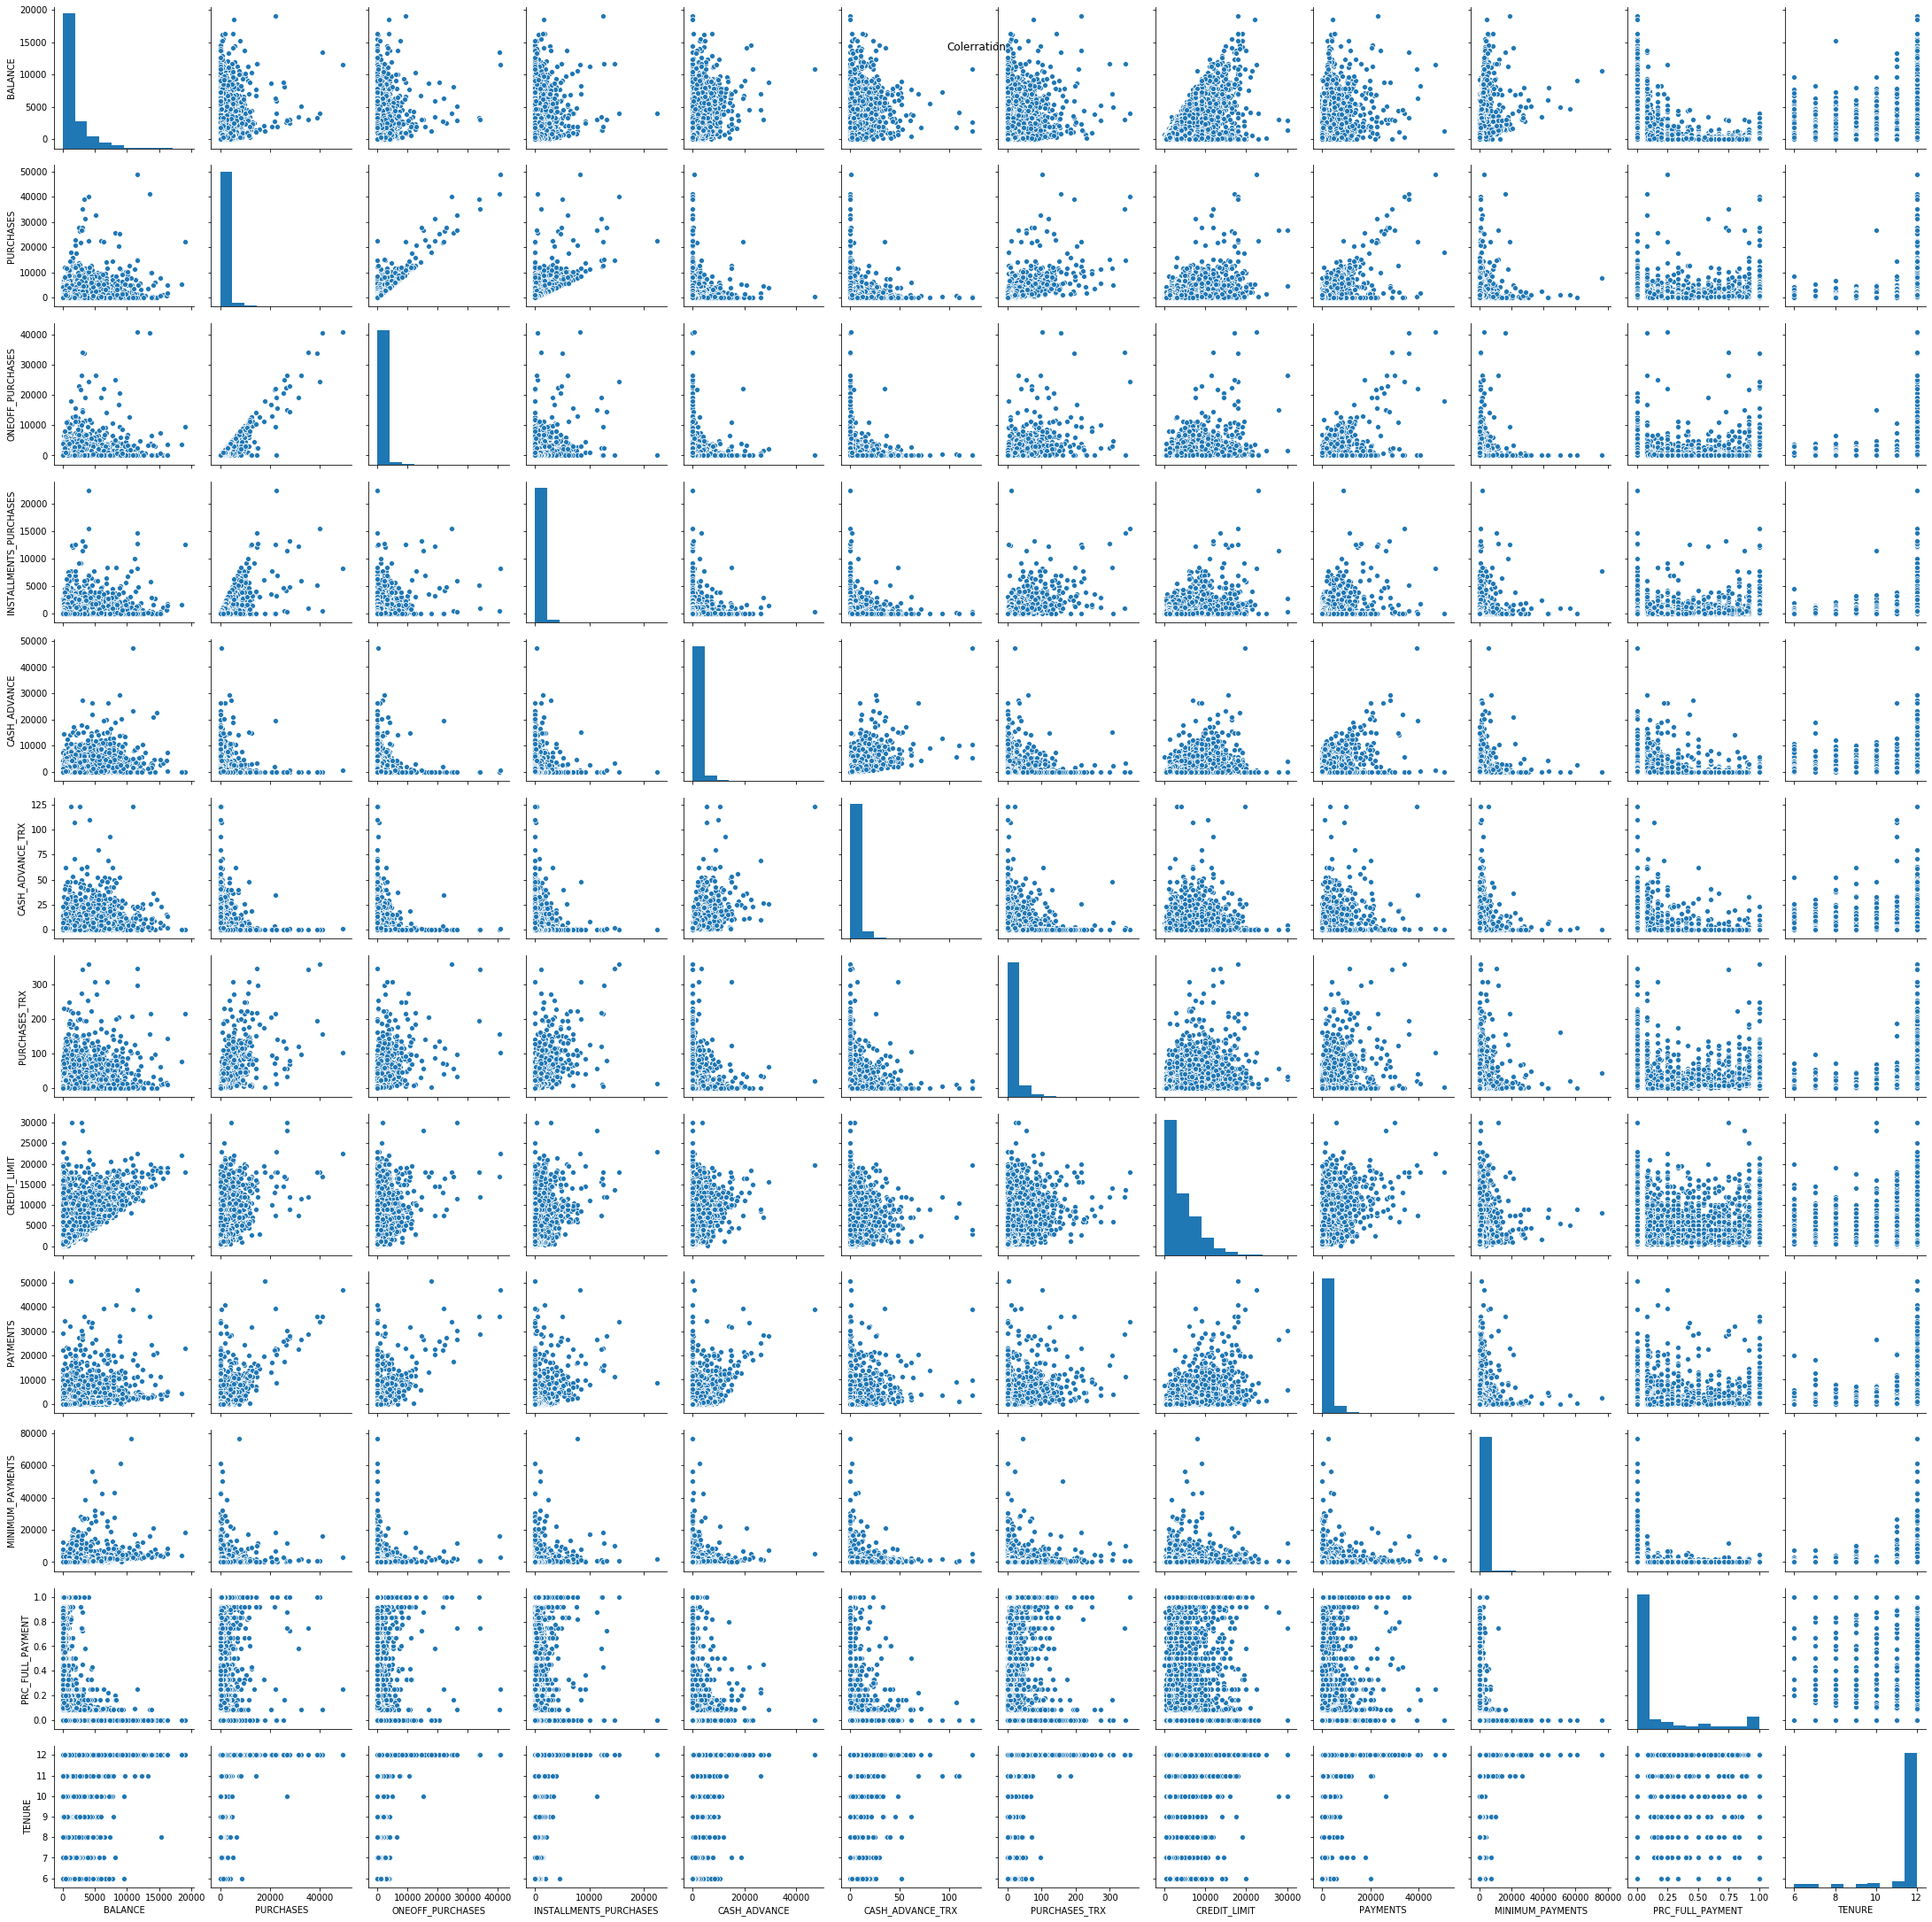

In [47]:
#Finding outliers and distribution
import seaborn as sns
p = sns.pairplot(Applicants)
p.fig.suptitle('Colerration')

In [48]:
Applicants.corr(method='pearson')

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.181261,0.164350,0.126469,0.496692,0.385152,0.154338,0.531212,0.322802,0.391542,-0.318959,0.072692
PURCHASES,0.181261,1.000000,0.916845,0.679896,-0.051474,-0.067175,0.689561,0.356924,0.603264,0.093054,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.916845,1.000000,0.330622,-0.031326,-0.046212,0.545523,0.319694,0.567292,0.048320,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.679896,0.330622,1.000000,-0.064244,-0.073999,0.628108,0.256464,0.384084,0.131109,0.182569,0.086143
CASH_ADVANCE,0.496692,-0.051474,-0.031326,-0.064244,1.000000,0.656498,-0.075850,0.303954,0.453238,0.137553,-0.152935,-0.068312
CASH_ADVANCE_TRX,0.385152,-0.067175,-0.046212,-0.073999,0.656498,1.000000,-0.066157,0.149676,0.255278,0.107829,-0.169784,-0.043421
PURCHASES_TRX,0.154338,0.689561,0.545523,0.628108,-0.075850,-0.066157,1.000000,0.272836,0.370832,0.096224,0.162066,0.121874
CREDIT_LIMIT,0.531212,0.356924,0.319694,0.256464,0.303954,0.149676,0.272836,1.000000,0.421809,0.125113,0.055638,0.138778
PAYMENTS,0.322802,0.603264,0.567292,0.384084,0.453238,0.255278,0.370832,0.421809,1.000000,0.123693,0.112138,0.106136
MINIMUM_PAYMENTS,0.391542,0.093054,0.048320,0.131109,0.137553,0.107829,0.096224,0.125113,0.123693,1.000000,-0.138836,0.060305


#### As we may see there is strong relation between ONEOFF_PURCHASES and PURCHASES so I will use PURCHASES in my model as it make more sense and show the customer's behavior better.

In [49]:
Applicants.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,592.437371,411.067645,978.871112,3.248827,14.709832,4494.673534,1733.143852,865.320834,0.153715,11.517318
std,2081.531879,2136.634782,1659.887917,904.338115,2097.163877,6.824647,24.857649,3638.674167,2895.063757,2348.881285,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,39.635000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,168.940844,0.000000,12.000000
50%,873.385231,361.280000,38.000000,89.000000,0.000000,0.000000,7.000000,3000.000000,856.901546,313.659939,0.000000,12.000000
75%,2054.140036,1110.130000,577.405000,468.637500,1113.821139,4.000000,17.000000,6500.000000,1901.134317,832.178621,0.142857,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [71]:
#Import Regression Model to predict CASH_ADVSNCE for BALANCE ,PAYMENTS, CREDIT_LIMIT and PURCHASES
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [88]:
#Creating dataset
Xb= Applicants[['BALANCE', 'PAYMENTS','CREDIT_LIMIT','PURCHASES']]
yb = Applicants[['CASH_ADVANCE']]
#Splitting the dataset
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size = 0.30,random_state=42 )
#Fitting the model
Linreg = LinearRegression()
Linreg.fit(Xb_train, yb_train)
print(Linreg.intercept_)
print(Linreg.coef_)

[42.98801222]
[[ 0.35186709  0.52962055  0.0015011  -0.53653793]]


In [89]:
#Priting RMSE metrics
yb_pred = Linreg.predict(Xb_test)
print(np.sqrt(metrics.mean_squared_error(yb_test,yb_pred)))

1551.5849528354008


In [77]:
#Now using Gradient Boost XGboost model
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [78]:
X1= Applicants[['BALANCE', 'PAYMENTS','CREDIT_LIMIT','PURCHASES']]
y1 = Applicants[['CASH_ADVANCE']]

In [81]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30,random_state=42 )

In [82]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3)
regressor.fit(X1_train, y1_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [83]:
#Priting RMSE metrics for xgboost regression
y1_pred = regressor.predict(X1_test)
print(np.sqrt(metrics.mean_squared_error(y1_test,y1_pred)))

1577.191665291251


In [84]:
#Now using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X1_train, y1_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [85]:
y2_pred = regr_1.predict(X1_test)
print(np.sqrt(metrics.mean_squared_error(y1_test,y2_pred)))

1637.69884774976


In [38]:
#Now using SVM Support Vector Machine
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
regr_2 = regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr_2.fit(X1_train, y1_train)

/Users/elham/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [87]:
y3_pred = regr_2.predict(X1_test)
print(np.sqrt(metrics.mean_squared_error(y1_test,y3_pred)))

1989.4596466996


### Based on the RMSEs I guess it better to go with Linearregression since it has the lowest one.